<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [82]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [83]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X.shape

(5000, 5)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [84]:
# you can write your code here
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

X_tr,X_cv,Y_tr,Y_cv = train_test_split(X_train,Y_train,test_size=0.25)

In [85]:
def decision_function(Xcv,sv,y_alp,intercept,gam):
  dec_fn = []
  #print(sv)
  #print(gam)
  #print(len(Xcv))
  for i in range(len(Xcv)):
    sum = 0
    for j in range(len(sv)):
      sum +=  (y_alp[j]*np.exp(-1*np.sum((Xcv[i,:]-sv[j,:])**2)*gam))
    dec_fn.append((sum+intercept).tolist())
  
  dec_fn = [i[0] for i in dec_fn]
  return dec_fn

In [86]:
gam = 0.001
clf = SVC(gamma= gam, C=100)
clf.fit(X_tr, Y_tr)
print(len(clf.support_))
y_alpha = clf.dual_coef_
intercept = clf.intercept_
sv = clf.support_vectors_
#print((y_alpha))
dec_fn_implem = decision_function(X_cv,sv,y_alpha[0],intercept,gam)
dec_fn_inbuilt = clf.decision_function(X_cv)


561


In [87]:
print("Function based decision function values are",dec_fn_implem[:5])
print("sklearn based decision function values are ",dec_fn_inbuilt.tolist()[:5])

Function based decision function values are [-4.161095825122163, 1.7233399647584635, -2.6499005585185555, 1.3091961267094492, -0.3664902922009814]
sklearn based decision function values are  [-4.161095825122163, 1.7233399647584635, -2.6499005585185555, 1.3091961267094492, -0.3664902922009814]


we can observe that both implementations result in the same values of decision function.

From above we can observe that the function implementation result and inbuilt scikitlearn function results are same.

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [88]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''

    n = len(y_true)
    x = np.log10(y_pred)
    x1 =  np.log10(np.ones_like(y_pred) - y_pred)
    loss = 0
    for j in range(n):
      loss = loss +((y_true[j]*x[j])+((1-y_true[j])*x1[j]))
    loss*=(-1/n)
    return loss

In [89]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero

    w = np.zeros_like(dim)
    b = 0

    return w,b

In [90]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return

    sigma = (1/(1+np.exp(-z)))

    return sigma

In [91]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''

    dw = (x*(y - sigmoid(np.matmul(w,x) + b))) - ((alpha/N)*w)

    return dw

In [92]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''

     db = (y - sigmoid(np.matmul(w,x) + b))

     return db

In [93]:
def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b

    w,b = initialize_weights(X_train[0])
    N = len(X_train)
    
    loss_train = []
    for i in range(epochs):
      w_prev,b_prev = w,b
      y_pred_train = []
      for j in range(len(X_train)):
        dw = gradient_dw(X_train[j,:], y_train[j], w, b, alpha, N)
        db = gradient_db(X_train[j,:], y_train[j], w, b)

        w = w + (eta0 * dw)
        b = b + (eta0 * db)
      for j in range(len(X_train)):
        y_pred_train.append(sigmoid(np.matmul(w,X_train[j,:]) + b))
      
      present=logloss(y_train, y_pred_train)
      loss_train.append(present)
      #print(present)

      if(i!=0 and loss_train[i-1]<present):
        print("Minimum loss achieved is",loss_train[i-1])
        return w_prev,b_prev,loss_train[:i]
    print("Minimum loss achieved is",present)
    return w,b,loss_train

In [94]:
N_pos = np.count_nonzero(Y_tr)
N_neg = len(Y_tr)-N_pos
y_pos = (N_pos+1)/(N_pos+2)
y_neg = (1/(N_neg+2))
#print(N_pos,N_neg,y_pos,y_neg)
print(Y_cv.tolist()[:4])
Y_cv_mod = np.zeros_like(Y_cv,dtype =float)
for i in range(len(Y_cv)):
  if Y_cv[i]==1:
    Y_cv_mod[i] = y_pos 
  else:
    Y_cv_mod[i] = y_neg
print(Y_cv_mod.tolist()[:4])

[0, 1, 0, 1]
[0.00048192771084337347, 0.9989235737351991, 0.00048192771084337347, 0.9989235737351991]


In the above results, list-1 indicates true or actual labels of Y_cv.
list-2 indicates the modified labels of Y_cv according to the given formulae.

We can observe that 0 label is replaced with 0.0004766 and label 1 is replaced with 0.9988962 

In [95]:
alpha=0.0001
eta0=0.001
N=len(X_tr)
epochs=1000
#print(np.array(dec_fn_implem).reshape(-1,1),np.array(Y_cv_mod).reshape(-1,1))
f_cv = np.array(dec_fn_implem).reshape(-1,1)
Y_cv_mod = np.array(Y_cv_mod).reshape(-1,1)
w,b,train_loss = train(f_cv,Y_cv_mod,epochs,alpha,eta0)

Minimum loss achieved is [0.07559336]


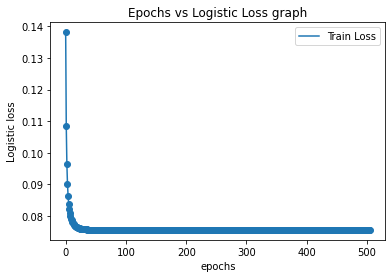

In [96]:
import matplotlib.pyplot as plt

epochs=[i for i in range(len(train_loss))]
plt.plot(epochs,train_loss,label= 'Train Loss')

plt.scatter(epochs,train_loss)

plt.legend()
plt.title('Epochs vs Logistic Loss graph')
plt.xlabel('epochs')
plt.ylabel('Logistic loss')
plt.show()

In [97]:
f_test = decision_function(X_test,sv,y_alpha[0],intercept,gam)
print(f_test[:4])
proba_1=[]
for i in range(len(X_test)):  
  proba_1.append(sigmoid(np.dot(w,f_test[i]) + b))

proba_1 = [i.tolist() for i in proba_1] 
proba_1 = [i[0] for i in proba_1]
print(proba_1[:4])

[-2.392145229826883, -2.9514350778685126, -1.6627732024593085, -4.619833147669826]
[0.011427693208354434, 0.003914680589311406, 0.04507717531280103, 0.00015725892037058434]


we can observe that if decision function value is negative it's probability of being class 1 $P(y=1/x)< 0.5 $ and is low and if it is positive it's $P(y=1/x) > 0.5$ and high.

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__







If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
